In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('working_datasets/cleaned_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548622 entries, 0 to 548621
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              548622 non-null  object 
 1   state             548622 non-null  object 
 2   district          548622 non-null  object 
 3   pincode           548622 non-null  int64  
 4   bio_age_5_17      548622 non-null  float64
 5   bio_age_17_       548622 non-null  float64
 6   demo_age_5_17     548622 non-null  float64
 7   demo_age_17_      548622 non-null  float64
 8   age_0_5           548622 non-null  int64  
 9   age_5_17          548622 non-null  int64  
 10  age_18_greater    548622 non-null  int64  
 11  total_bio         548622 non-null  float64
 12  total_demo        548622 non-null  float64
 13  total_enrollment  548622 non-null  int64  
 14  bio_success_rate  548622 non-null  float64
 15  month             548622 non-null  int64  
 16  quarter           54

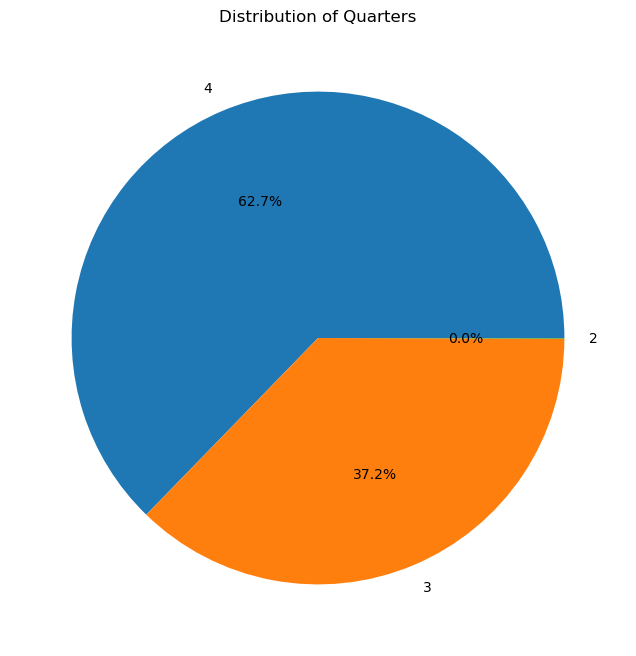

In [5]:
# pi chart for representing the quarters
quarter_counts = df['quarter'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quarter_counts.values, labels=quarter_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Quarters')
plt.show()

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_25428\453312692.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biometric_success_by_pincode = df.groupby('pincode_range')['bio_success_rate'].mean()


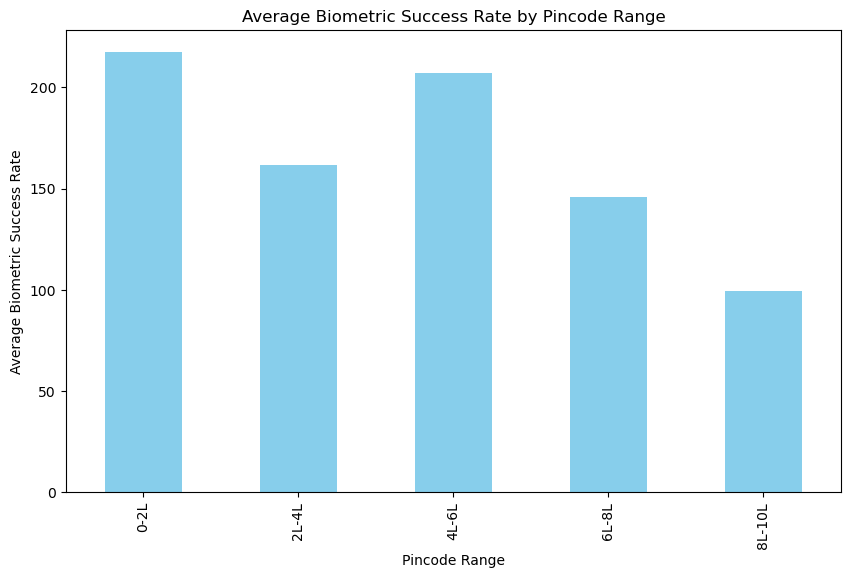

In [9]:
#plotting biomeetric success rates as per pincode ranges
pincode_bins = [0, 200000, 400000, 600000, 800000, 1000000]
pincode_labels = ['0-2L', '2L-4L', '4L-6L', '6L-8L', '8L-10L']
df['pincode_range'] = pd.cut(df['pincode'], bins=pincode_bins, labels=pincode_labels)
biometric_success_by_pincode = df.groupby('pincode_range')['bio_success_rate'].mean()
plt.figure(figsize=(10, 6))
biometric_success_by_pincode.plot(kind='bar', color='skyblue')
plt.title('Average Biometric Success Rate by Pincode Range')
plt.xlabel('Pincode Range')
plt.ylabel('Average Biometric Success Rate')
plt.show()

In [11]:
# IQR analysis to identify the pincodes extreme high and low success rates
Q1 = df['bio_success_rate'].quantile(0.25)
Q3 = df['bio_success_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['bio_success_rate'] < lower_bound) | (df['bio_success_rate'] > upper_bound)]
print("Outlier Pincodes based on Biometric Success Rate:")
print(outliers[['pincode', 'bio_success_rate']])
# further analysis can be done on the derived pincodes having success rates on extremitites

Outlier Pincodes based on Biometric Success Rate:
        pincode  bio_success_rate
403      577556            400.00
404      577528            566.67
426      571127            420.00
435      833216            523.08
436      833216            523.08
...         ...               ...
548091   532211           1000.00
548223   742230            600.00
548269   712701           1900.00
548279   712305            650.00
548605   742307            400.00

[47328 rows x 2 columns]


In [14]:
# Top 10 pincodes and respective districts with highest biometric success rates
top_10_biometric = df.nlargest(10, 'bio_success_rate')[['pincode', 'district', 'bio_success_rate']]
print("Top 10 Pincodes with Highest Biometric Success Rates:")
print(top_10_biometric)

Top 10 Pincodes with Highest Biometric Success Rates:
        pincode    district  bio_success_rate
496002   182122    Udhampur           14000.0
391452   444708    Amravati           13700.0
176536   425419   Nandurbar           13500.0
489104   181132       Jammu           12500.0
494630   425414   Nandurbar           12100.0
495445   182146      Ramban           11300.0
492309   783375     Chirang           10800.0
198621   441908    Bhandara           10500.0
496786   144410   Jalandhar           10200.0
335204   441209  Gadchiroli           10000.0


In [16]:
# top 10 pincodes with lowest biometric success rates which are not 0
top_10_low_biometric = df[df['bio_success_rate'] > 0].nsmallest(10, 'bio_success_rate')[['pincode','district', 'bio_success_rate']]
print("Top 10 Pincodes with Lowest Biometric Success Rates:")
print(top_10_low_biometric)

Top 10 Pincodes with Lowest Biometric Success Rates:
        pincode           district  bio_success_rate
105594   743368  South_24_Parganas              0.56
508585   110094   North_East_Delhi              0.56
508636   421302              Thane              0.56
508661   782124             Nagaon              0.56
508701   495115            Mungeli              0.57
508593   263139           Nainital              0.58
205075   803101            Nalanda              0.59
48380    723131           Puruliya              0.60
205472   854315             Purnia              0.60
205486   855113            Katihar              0.61


In [19]:
# combining the above two analyses to find any overlaps
overlap_pincodes = pd.merge(top_10_biometric, top_10_low_biometric, on=['pincode', 'district', 'bio_success_rate'], how='inner')
print("Overlapping Pincodes in Top 10 Highest and Lowest Biometric Success Rates:")
print(overlap_pincodes)

Overlapping Pincodes in Top 10 Highest and Lowest Biometric Success Rates:
Empty DataFrame
Columns: [pincode, district, bio_success_rate]
Index: []


In [21]:
# top 5 states / UTs with highest and lowest average biometric success rates by combining the distrct specific data
state_biometric_success = df.groupby('state')['bio_success_rate'].mean().reset_index()
top_5_states = state_biometric_success.nlargest(5, 'bio_success_rate')
bottom_5_states = state_biometric_success.nsmallest(5, 'bio_success_rate')
print("Top 5 States/UTs with Highest Average Biometric Success Rates:")
print(top_5_states)
print("Top 5 States/UTs with Lowest Average Biometric Success Rates:")
print(bottom_5_states)


Top 5 States/UTs with Highest Average Biometric Success Rates:
                     state  bio_success_rate
12           Daman_And_Diu        549.398000
33             Pondicherry        340.204275
26             Maharashtra        294.543848
9   Dadra_And_Nagar_Haveli        293.803605
24             Lakshadweep        285.710492
Top 5 States/UTs with Lowest Average Biometric Success Rates:
                                       state  bio_success_rate
10  Dadra_And_Nagar_Haveli_And_Daman_And_Diu         33.012609
43                               West_Bengal         75.317360
5                                      Bihar         75.835490
37                                    Sikkim         84.918736
6                                 Chandigarh         92.616608


In [17]:
# --------------------CONSISTENCY CHECKS-------------------- #

In [ ]:
df['registration_difference'] = df['total_demo'] - df['total_bio']
inconsistent_registrations = df[df['registration_difference'] != 0]
print("Pincodes with Inconsistent Total Registrations between Demographic and Biometric:")
print(inconsistent_registrations[['pincode', 'registration_difference']])

Pincodes with Inconsistent Total Registrations between Demographic and Biometric:
        pincode  registration_difference
0        395006                      2.0
1        400070                      2.0
2        226016                      2.0
3        110092                      2.0
4        560066                      2.0
...         ...                      ...
548617   721632                     10.0
548618   721631                     34.0
548619   721455                      3.0
548620   721442                     -5.0
548621   227808                     35.0

[518516 rows x 2 columns]


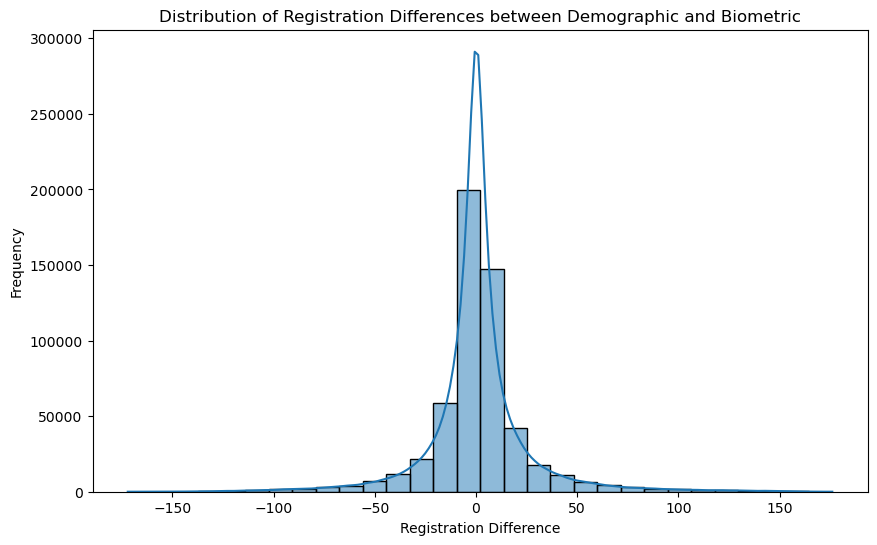

In [28]:
#plotting the difference distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['registration_difference'], bins=30, kde=True)
plt.title('Distribution of Registration Differences between Demographic and Biometric')
plt.xlabel('Registration Difference')
plt.ylabel('Frequency')
plt.show()

In [29]:
# comparing the total registrations of biometric vs enrolment to see if they match
df['registration_difference_1'] = df['total_enrollment'] - df['total_bio']
inconsistent_registrations = df[df['registration_difference_1'] != 0]
print("Pincodes with Inconsistent Total Registrations between Enrolment and Biometric:")
print(inconsistent_registrations[['pincode', 'registration_difference_1']])

Pincodes with Inconsistent Total Registrations between Enrolment and Biometric:
        pincode  registration_difference_1
0        395006                      461.0
1        400070                       16.0
2        226016                      186.0
3        110092                      737.0
4        560066                       80.0
...         ...                        ...
548617   721632                       15.0
548618   721631                       23.0
548619   721455                       -1.0
548620   721442                       -5.0
548621   227808                      -19.0

[516258 rows x 2 columns]


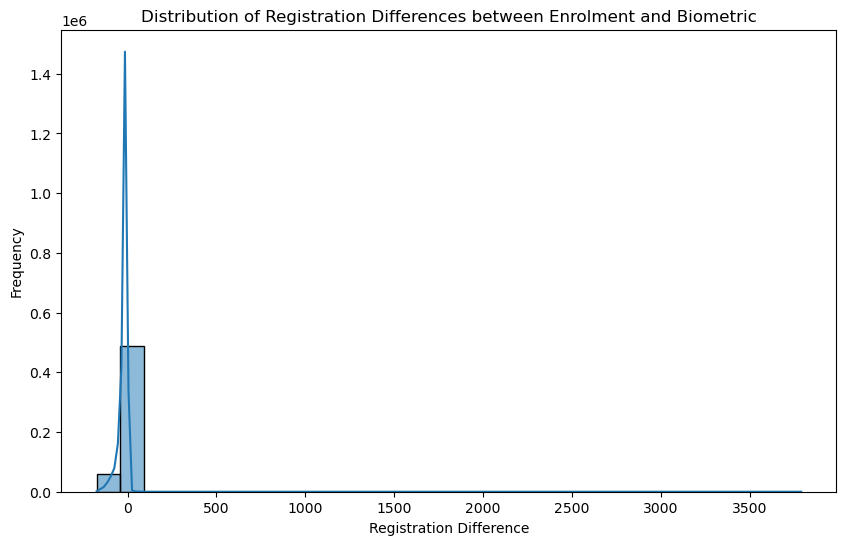

In [31]:
#plotting the above inconsistencies
plt.figure(figsize=(10, 6))
sns.histplot(df['registration_difference_1'], bins=30, kde=True)
plt.title('Distribution of Registration Differences between Enrolment and Biometric')
plt.xlabel('Registration Difference')
plt.ylabel('Frequency')
plt.show()